## Importing Libraries

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy.io import arff
warnings.filterwarnings('ignore')
%matplotlib inline

## Loading the data

In [74]:
data = arff.loadarff("data/phishing_domain_data_uci.arff")
data= pd.DataFrame(data[0])
data = data.apply(lambda x: x.str.decode('utf8'))
data = data.apply(pd.to_numeric, errors = 'ignore')

## EDA

In [75]:
data.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [76]:
data.tail()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
11050,1,-1,1,-1,1,1,1,1,-1,-1,...,-1,-1,1,1,-1,-1,1,1,1,1
11051,-1,1,1,-1,-1,-1,1,-1,-1,-1,...,-1,1,1,1,1,1,1,-1,1,-1
11052,1,-1,1,1,1,-1,1,-1,-1,1,...,1,1,1,1,1,-1,1,0,1,-1
11053,-1,-1,1,1,1,-1,-1,-1,1,-1,...,-1,1,1,1,1,-1,1,1,1,-1
11054,-1,-1,1,1,1,-1,-1,-1,1,1,...,1,1,-1,1,-1,-1,-1,1,-1,-1


In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   having_IP_Address            11055 non-null  int64
 1   URL_Length                   11055 non-null  int64
 2   Shortining_Service           11055 non-null  int64
 3   having_At_Symbol             11055 non-null  int64
 4   double_slash_redirecting     11055 non-null  int64
 5   Prefix_Suffix                11055 non-null  int64
 6   having_Sub_Domain            11055 non-null  int64
 7   SSLfinal_State               11055 non-null  int64
 8   Domain_registeration_length  11055 non-null  int64
 9   Favicon                      11055 non-null  int64
 10  port                         11055 non-null  int64
 11  HTTPS_token                  11055 non-null  int64
 12  Request_URL                  11055 non-null  int64
 13  URL_of_Anchor                11055 non-null  i

In [78]:
data.dtypes

having_IP_Address              int64
URL_Length                     int64
Shortining_Service             int64
having_At_Symbol               int64
double_slash_redirecting       int64
Prefix_Suffix                  int64
having_Sub_Domain              int64
SSLfinal_State                 int64
Domain_registeration_length    int64
Favicon                        int64
port                           int64
HTTPS_token                    int64
Request_URL                    int64
URL_of_Anchor                  int64
Links_in_tags                  int64
SFH                            int64
Submitting_to_email            int64
Abnormal_URL                   int64
Redirect                       int64
on_mouseover                   int64
RightClick                     int64
popUpWidnow                    int64
Iframe                         int64
age_of_domain                  int64
DNSRecord                      int64
web_traffic                    int64
Page_Rank                      int64
G

In [79]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
having_IP_Address,11055.0,0.313795,0.949534,-1.0,-1.0,1.0,1.0,1.0
URL_Length,11055.0,-0.633198,0.766095,-1.0,-1.0,-1.0,-1.0,1.0
Shortining_Service,11055.0,0.738761,0.673998,-1.0,1.0,1.0,1.0,1.0
having_At_Symbol,11055.0,0.700588,0.713598,-1.0,1.0,1.0,1.0,1.0
double_slash_redirecting,11055.0,0.741474,0.671011,-1.0,1.0,1.0,1.0,1.0
Prefix_Suffix,11055.0,-0.734962,0.678139,-1.0,-1.0,-1.0,-1.0,1.0
having_Sub_Domain,11055.0,0.063953,0.817518,-1.0,-1.0,0.0,1.0,1.0
SSLfinal_State,11055.0,0.250927,0.911892,-1.0,-1.0,1.0,1.0,1.0
Domain_registeration_length,11055.0,-0.336771,0.941629,-1.0,-1.0,-1.0,1.0,1.0
Favicon,11055.0,0.628584,0.777777,-1.0,1.0,1.0,1.0,1.0


In [80]:
data.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


### Checking for null values

In [81]:
data.isnull().sum()

having_IP_Address              0
URL_Length                     0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistical_report             0
Result    

## Visualisations

#### Distribution of target feature

In [82]:
perc_of_values = data['Result'].value_counts().values.tolist()

In [83]:
perc_of_values

[6157, 4898]

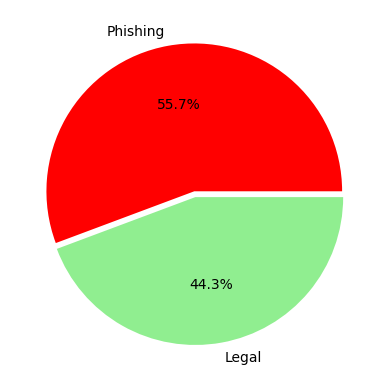

In [84]:
labels = ['Phishing','Legal' ]
colors = ['red', 'lightgreen']

plt.pie(perc_of_values, labels = labels, colors = colors, explode = (0.02, 0.02), autopct='%1.1f%%')
plt.show()

#### Distribution of some important features with respect to the Result

- Red color indicates the effectiveness of the feature leading to a phishing domain.
- Blue color indicates the effectiveness of the feature leading to a legitimate domain.

In [85]:
def plot_scenario(data,val, outcome):

    def return_color(df) -> list:
        colors = []
        for i in df.index:
            if i.count(1) == 1:
                colors.append('red')
            else:
                colors.append('blue')
        return colors
  
    df = data.groupby([val,outcome])[val].count()
    df.plot(kind = 'bar', color=return_color(df))
    plt.title(f"{val} vs {outcome}")
    plt.show()

In [86]:
cols = data.columns.tolist()

In [87]:
cols.remove('Result')

In [88]:
cols

['having_IP_Address',
 'URL_Length',
 'Shortining_Service',
 'having_At_Symbol',
 'double_slash_redirecting',
 'Prefix_Suffix',
 'having_Sub_Domain',
 'SSLfinal_State',
 'Domain_registeration_length',
 'Favicon',
 'port',
 'HTTPS_token',
 'Request_URL',
 'URL_of_Anchor',
 'Links_in_tags',
 'SFH',
 'Submitting_to_email',
 'Abnormal_URL',
 'Redirect',
 'on_mouseover',
 'RightClick',
 'popUpWidnow',
 'Iframe',
 'age_of_domain',
 'DNSRecord',
 'web_traffic',
 'Page_Rank',
 'Google_Index',
 'Links_pointing_to_page',
 'Statistical_report']

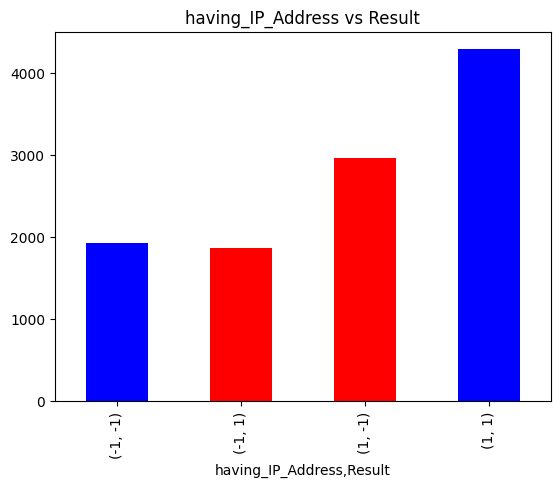

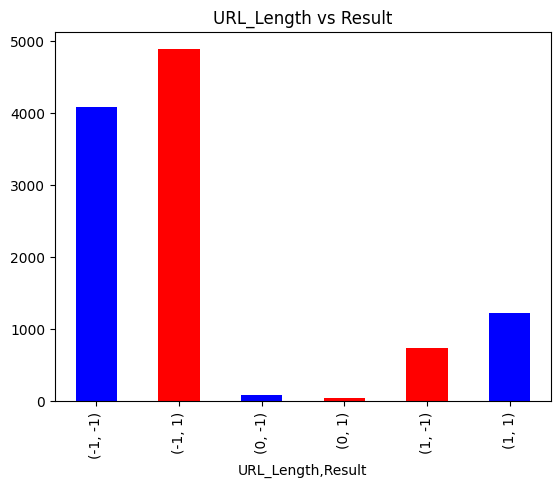

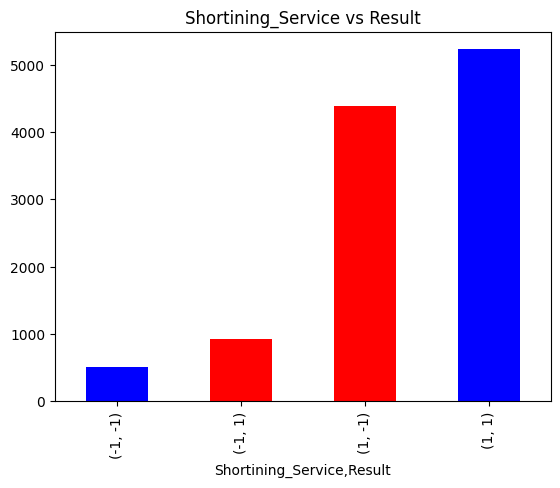

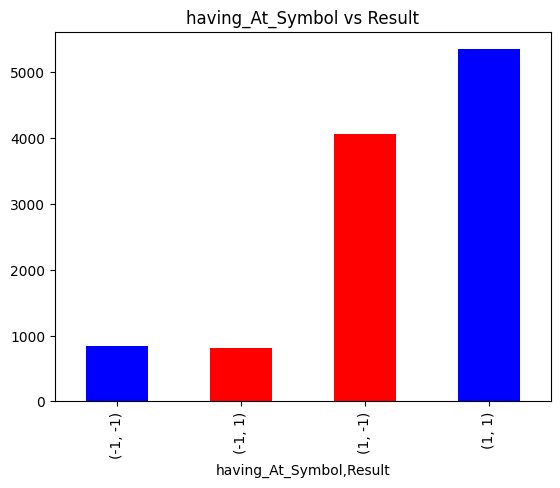

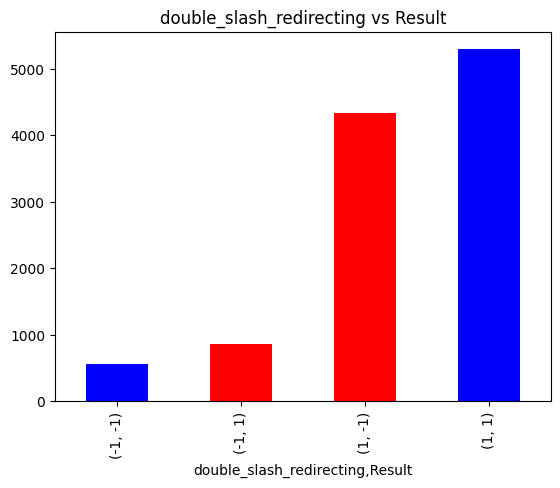

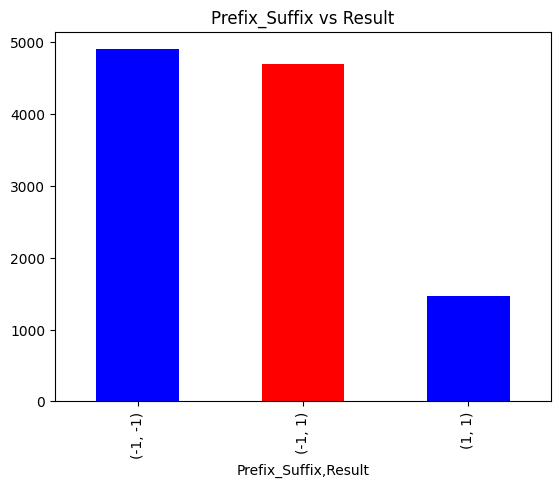

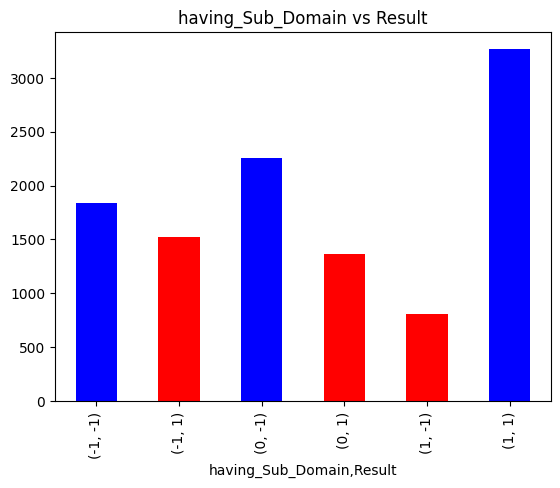

In [89]:
for col in cols:
    plot_scenario(data = data,val = col, outcome='Result' )

#### Correlation Heatmap

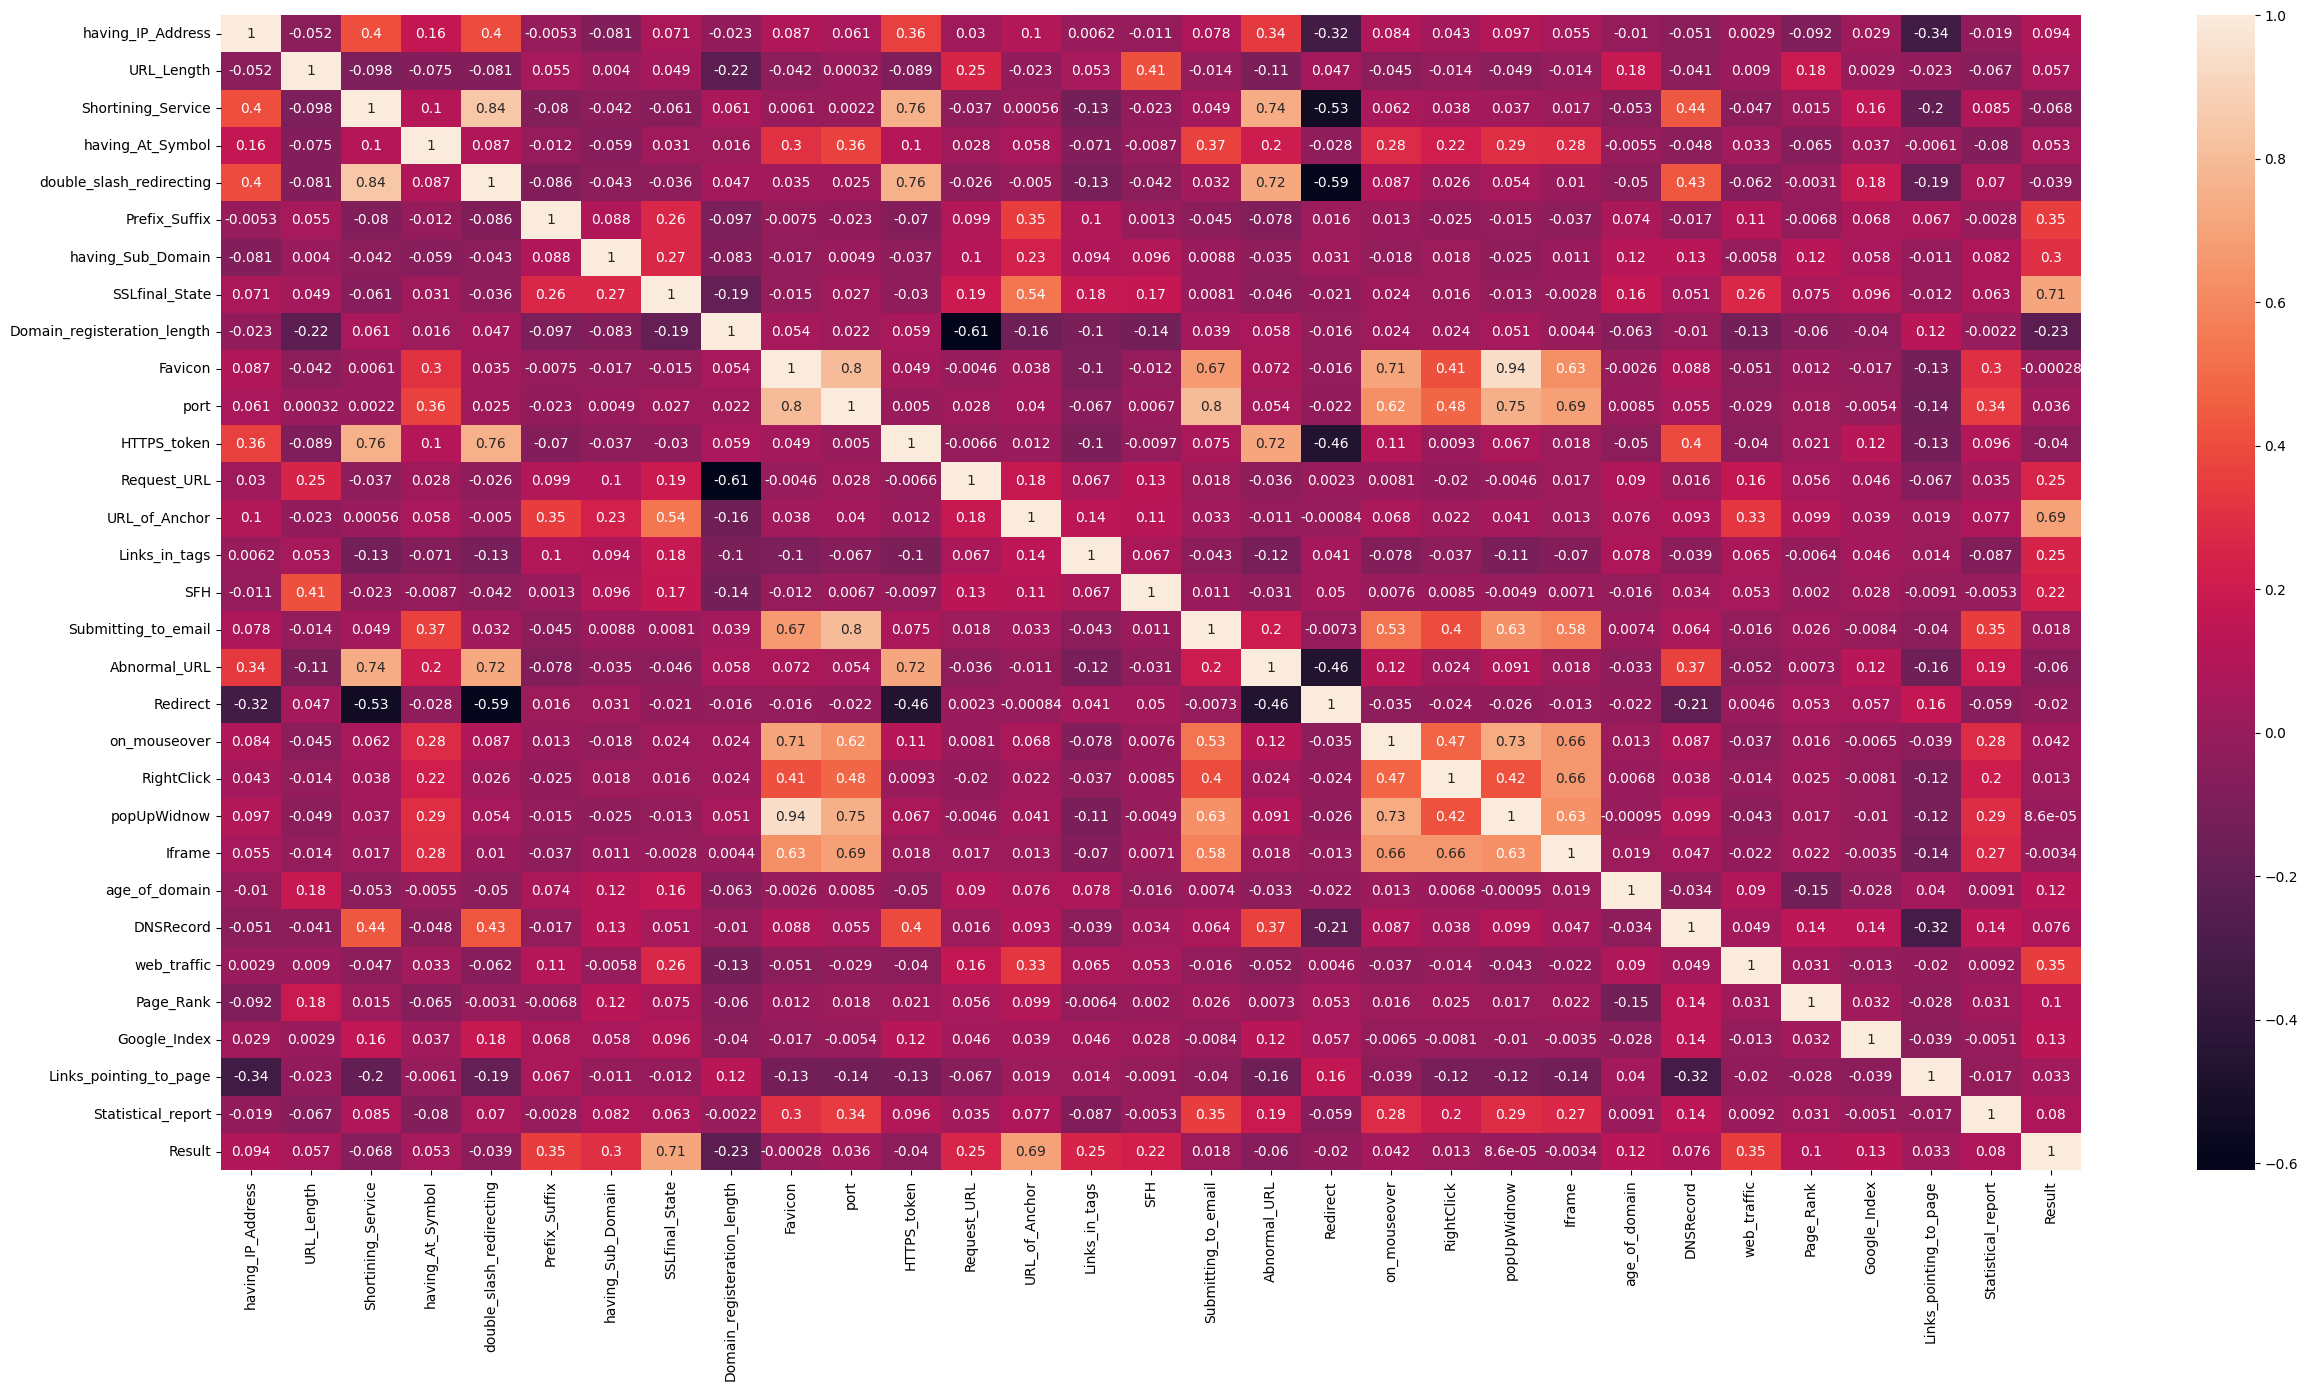

In [ ]:
plt.figure(figsize=(30,15))
sns.heatmap(data.corr(), annot=True)
plt.show()

In [ ]:
data.columns

Index(['having_IP_Address', 'URL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
       'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor',
       'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL',
       'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe',
       'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank',
       'Google_Index', 'Links_pointing_to_page', 'Statistical_report',
       'Result'],
      dtype='object')

In [ ]:
data['age_of_domain'].value_counts()

age_of_domain
 1    5866
-1    5189
Name: count, dtype: int64

## Feature Report 
1. `having_ip_address` : If the domain contains an ip address structure. (-1 = Phishing | 1 = Legal)
2. `URL_Length` : The length of the url. (-1 = Medium | 0 = Long | 1 = Very Long)
3. `Shortining_Service` : If the url is shortened. (-1 = Phishing | 1 = Legal)
4. `double_slash_redirecting` : If the url redirects. Can be defined by calculating the last occurence of the '//'. (-1 = Phishing | 1 = Legal)
5. `Prefix_Suffix` : Presence of '-' in the url. (-1 = Phishing | 1 = Legal)
6. `having_Sub_Domain` : Checks the number of subdomian found in the domain of the url.(-1 = Legitimate | 0 = Suspicious | 1 = Phishing)
7. `SSLfinal_State` : Checks the presence of 'https' and the age of certificate. (-1 = Legitimate | 0 = Suspicious | 1 = Phishing)
8. `Domain_registeration_length` : Time since the domain was registered. (-1 = Phishing | 1 = Legal)
9. `Favicon` : Checks whether the favicon is loaded form an external domain or not. (-1 = Phishing | 1 = Legal)
10. `port` : Checks for the status of Non standard ports. (-1 = Phishing | 1 = Legal)
11. `HTTPS_token` : Checks whether 'https' is present in the domain. (-1 = Phishing | 1 = Legal)
12. `Request_URL` : Checks whether the emmbedded objects are loaded using the same domain. (-1 = Phishing | 1 = Legal)
13. `URL_of_Anchor` : Checks whether the anchor links contains the same domain or not. (-1 = Phishing | 1 = Legal)
14. `Links_in_tags` : Checks whether the tag links contains the same domain or not. (-1 = Phishing | 1 = Legal)
15. `SFH(Server Form Handler)` : Checks whether the Server form handeler is form the same domain, diffrent domain or blank.(-1 = Legitimate | 0 = Suspicious | 1 = Phishing)
16. `Submitting_to_email` :Checks if the form is getting submitted to a mail or not. (-1 = Phishing | 1 = Legal)
17. `Abnormal_URL` : Checks if the host name is included in the url or not. (-1 = Phishing | 1 = Legal)
18. `Redirect` : Checks how many times the website redirects. (-1 = Legitimate | 0 = Suspicious | 1 = Phishing)
19. `on_mouseover` : Checks if mouse over event changes the status bar. (-1 = Phishing | 1 = Legal)
20. `RightClick` : Checks if the right click is disabled or not. (-1 = Phishing | 1 = Legal)
21. `popUpWidnow` : Checks if the popup window contains text fields or not. (-1 = Phishing | 1 = Legal)
22. `Iframe` : Checks the presense of IFrame tag. (-1 = Phishing | 1 = Legal)
23. `age_of_domain` : Checks if the age of the domain is more than 6 months or not. (-1 = Phishing | 1 = Legal)
24. `DNSRecord` : Checks if the DNS record is present in the whois database or not. (-1 = Phishing | 1 = Legal)
25. `web_traffic` : Checks for the website rank on alexa database. (-1 = Legitimate | 0 = Suspicious | 1 = Phishing)
26. `Page_Rank` : Checks if the pagerank of the doamin is less than 2 or not. (-1 = Phishing | 1 = Legal)
27. `Google_Index` : Checks whether the website is present in the google index or not. (-1 = Phishing | 1 = Legal)
28. `Links_pointing_to_page` : Checks the number of links pointing to the page. (-1 = Legitimate | 0 = Suspicious | 1 = Phishing)
29. `Statistical_report` : Checks if the host belongs to the known phishing domains or not. (-1 = Phishing | 1 = Legal)